In [42]:
import pandas as pd
import numpy as np
import os
import glob

In [2]:
# find the working directory w/ following command:
!pwd

/Users/jonathanmaat/data_science/alt_spin


In [3]:
# to find remaning files inside of alt_spin
!ls

coors_curve_data.csv    petco_curve_data.csv    spinrate-analysis.ipynb
coors_slider_data.csv   petco_slider_data.csv


In [13]:
#coors curveball dataframe
df = pd.read_csv('coors_curve_data.csv') 
df['pitch_type'] = 'curve'
df['stadium'] = 'coors'

#remove columns
df.drop(['player_name','ba','iso', 'babip','slg','woba','xwoba','xba','hits','abs','launch_speed','launch_angle','effective_speed','whiffs','swings','takes','eff_min_vel','release_extension','pos3_int_start_distance','pos4_int_start_distance','pos5_int_start_distance','pos6_int_start_distance','pos7_int_start_distance','pos8_int_start_distance','pos9_int_start_distance'], axis =1, inplace = True)
df.head()


,pitches,player_id,year,total_pitches,pitch_percent,spin_rate,velocity,pitch_type,stadium
0,46,HOU,2020,322,14.3,2954,79.5,curve,coors
1,49,CIN,2021,654,7.5,2913,81.1,curve,coors
2,43,HOU,2018,293,14.7,2911,81.0,curve,coors
3,86,CIN,2019,438,19.6,2858,80.5,curve,coors
4,43,ATL,2019,405,10.6,2832,75.9,curve,coors


In [8]:
#coors slider dataframe
cs_df = pd.read_csv('coors_slider_data.csv') 
cs_df['pitch_type'] = 'slider'
cs_df['stadium'] = 'coors'

#remove columns
cs_df.drop(['player_name','ba','iso', 'babip','slg','woba','xwoba','xba','hits','abs','launch_speed','launch_angle','effective_speed','whiffs','swings','takes','eff_min_vel','release_extension','pos3_int_start_distance','pos4_int_start_distance','pos5_int_start_distance','pos6_int_start_distance','pos7_int_start_distance','pos8_int_start_distance','pos9_int_start_distance'], axis =1, inplace = True)
cs_df.head()

,pitches,player_id,year,total_pitches,pitch_percent,spin_rate,velocity,pitch_type,stadium
0,40,HOU,2019,330,12.1,2677,83.5,slider,coors
1,63,MIL,2019,472,13.3,2643,85.8,slider,coors
2,92,ATL,2019,405,22.7,2639,84.5,slider,coors
3,199,CIN,2021,654,30.4,2626,85.8,slider,coors
4,123,SD,2020,996,12.3,2609,87.1,slider,coors


In [10]:
#petco curveball dataframe
pc_df = pd.read_csv('coors_curve_data.csv') 
pc_df['pitch_type'] = 'curve'
pc_df['stadium'] = 'petco'

#remove columns
pc_df.drop(['player_name','ba','iso', 'babip','slg','woba','xwoba','xba','hits','abs','launch_speed','launch_angle','effective_speed','whiffs','swings','takes','eff_min_vel','release_extension','pos3_int_start_distance','pos4_int_start_distance','pos5_int_start_distance','pos6_int_start_distance','pos7_int_start_distance','pos8_int_start_distance','pos9_int_start_distance'], axis =1, inplace = True)
pc_df.head()

,pitches,player_id,year,total_pitches,pitch_percent,spin_rate,velocity,pitch_type,stadium
0,46,HOU,2020,322,14.3,2954,79.5,curve,petco
1,49,CIN,2021,654,7.5,2913,81.1,curve,petco
2,43,HOU,2018,293,14.7,2911,81.0,curve,petco
3,86,CIN,2019,438,19.6,2858,80.5,curve,petco
4,43,ATL,2019,405,10.6,2832,75.9,curve,petco


In [11]:
#petco slider dataframe
ps_df = pd.read_csv('petco_slider_data.csv') 
ps_df['pitch_type'] = 'slider'
ps_df['stadium'] = 'petco'

#remove columns
ps_df.drop(['player_name','ba','iso', 'babip','slg','woba','xwoba','xba','hits','abs','launch_speed','launch_angle','effective_speed','whiffs','swings','takes','eff_min_vel','release_extension','pos3_int_start_distance','pos4_int_start_distance','pos5_int_start_distance','pos6_int_start_distance','pos7_int_start_distance','pos8_int_start_distance','pos9_int_start_distance'], axis =1, inplace = True)
ps_df.head()

,pitches,player_id,year,total_pitches,pitch_percent,spin_rate,velocity,pitch_type,stadium
0,65,PIT,2021,388,16.8,2763,85.3,slider,petco
1,66,TB,2019,461,14.3,2746,84.8,slider,petco
2,95,ATL,2019,450,21.1,2620,84.0,slider,petco
3,83,PIT,2022,470,17.7,2611,86.3,slider,petco
4,915,SD,2020,4603,19.9,2604,86.4,slider,petco


['curve' 'slider']
['coors' 'petco']


{'whiskers': [<matplotlib.lines.Line2D at 0x7f919aef8100>,
 'caps': [<matplotlib.lines.Line2D at 0x7f919aef8790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f91907a0d60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f919aef8e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f919af041c0>],
 'means': []}

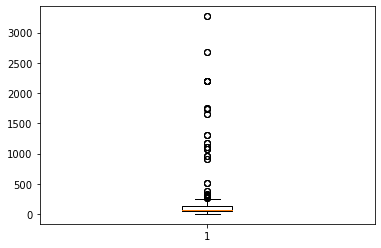

In [37]:
# combine the four dataframes together
df = df.append(cs_df, ignore_index = True)
df = df.append(ps_df, ignore_index = True)
df = df.append(pc_df, ignore_index = True)

print(df['pitch_type'].unique())
print(df['stadium'].unique())

plt.boxplot(df['pitches'])

<AxesSubplot:xlabel='year', ylabel='spin_rate'>

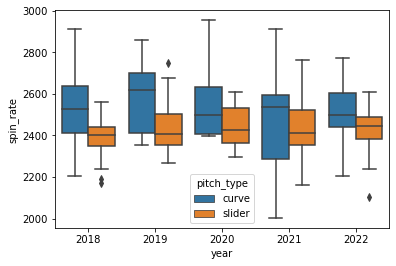

In [26]:
# grouped boxplot with seaborn
import seaborn as sns

sns.boxplot(x='year', y='spin_rate', hue = 'pitch_type', data = df)



## Originally I was wondering if there would be improvement in spin rate year to year, due to incrased usage in illegal substances but over there does not seem to be a large effect

['coors' 'petco']


<AxesSubplot:xlabel='year', ylabel='spin_rate'>

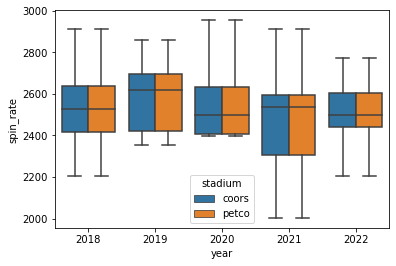

In [35]:
# testing the difference in spin rate from park to park 

curve_df = df[df['pitch_type']== 'curve']

# reasonability check make sure coors and petco in dataframe
print(curve_df['stadium'].unique())

sns.boxplot(x='year',y='spin_rate', hue='stadium', data = curve_df)

<AxesSubplot:xlabel='year', ylabel='spin_rate'>

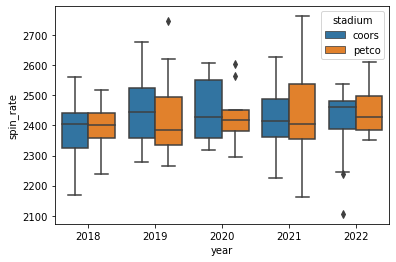

In [33]:
slider_df = df[df['pitch_type']=='slider']
sns.boxplot(x='year',y='spin_rate', hue='stadium', data = slider_df)

### It seems like using average team data is not suffient to see the difference in spin rate in higher altitude, I am going to attempt to pull data from individuals and compare their curveball and slider spins rates now.

In [41]:
# issue: average spin rate does not correlate to break of pitch
# website does not allow for me to gather data for break of pitches between parks

# THIS IS TOO DETRIMENTAL TO MY PROJECT

In [43]:
print('testing github')

testing github
